Neste exemplo procuramos utilizar as ferramentas presentes no GDSFactory (https://gdsfactory.github.io/gdsfactory/) para importar o design de um MMI 1x2 presente em sua biblioteca e realizar a simulação FDTD utilizando o MEEP (https://github.com/NanoComp/meep). Importante lembrar que há o plugin `gmeep` no GDSFactory que simplifica o uso do MEEP.

In [1]:
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import meep as mp
from meep import MaterialGrid, Medium, Vector3, Volume

Using MPI version 4.0, 1 processes


In [3]:
import gdsfactory as gf
import gdsfactory.simulation as sim
import gdsfactory.simulation.gmeep as gm
from gdsfactory.generic_tech import get_generic_pdk

gf.config.rich_output()
PDK = get_generic_pdk()
PDK.activate()

2023-06-09 11:01:28.011 | WARNING  | gdsfactory.config:showwarning:60 - The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
/home/adolfofh/mambaforge/lib/python3.9/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
2023-06-09 11:01:28.012 | WARNING  | gdsfactory.config:showwarning:60 - The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
/home/adolfofh/mambaforge/lib/python3.9/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
2023-06-09 11:01:28.012 | WARNING  | gdsfactory.config:showwarning:60 - The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
/home/adolfofh/mambaforge/lib/python3.9/site-packages/numpy/core/getlimits.py:500: UserWarning: T

Iremos simular um MMI 1x2 (https://gdsfactory.github.io/gdsfactory/components.html?highlight=components+mmi#gdsfactory.components.mmi1x2) disponível na lista de componentes do GDSFactory. Vamos tentar reproduzir os resultados do MMI 1x2 da Conerstone (SOI220nm_1550nm_TE_RIB_2x1_MMI) (https://www.cornerstone.sotonfab.co.uk/mpw-design-rules/process-design-kit-pdk).

<img src="imagens\mmi1x2_conerstone.png" alt="Alternative text" />

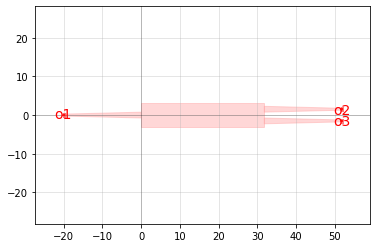

In [4]:
c = gf.components.mmi1x2(width_taper=1.5, length_taper=20, length_mmi=31.8, width_mmi=6, gap_mmi=1.52)
c.plot()

Utilizando apenas o MEEP, precisamos definir a região de simulação, a geometria, a condição de fronteira, as propriedades da fonte e dos monitores. Utilizando o plugin `gmeep`, usamos apenas o seguinte comando:

2023-06-09 11:01:29.052 | WARNING  | gdsfactory.config:showwarning:60 - Casting complex values to real discards the imaginary part
/home/adolfofh/mambaforge/lib/python3.9/site-packages/meep/__init__.py:4445: ComplexWarning: Casting complex values to real discards the imaginary part
  return _meep._get_epsilon_grid(gobj_list, mlist, _default_material, _ensure_periodicity, gv, cell_size, cell_center, nx, xtics, ny, ytics, nz, ztics, grid_vals, frequency)


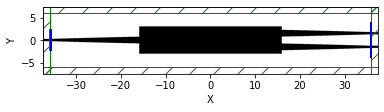

In [5]:
sp = gm.write_sparameters_meep(c, run=False, ymargin_top=3, ymargin_bot=3, is_3d=False)

Importante destacar que este comando utiliza as funções do MEEP para criação da região de simulação, assim como os demais elementos. Note também os argumentos:
1. ```run=False```: Desabilita a simulação, utilizado para ilustrar a geometria do dispositivo, assim como a região de simulação e portas;
1. ```is_3d=False```: Simulação 2D apenas.
Importante observar que, nesse caso ```run=False```, o retorno da função ```write_sparameters_meep``` é um objeto tipo ```Simulation dict``` e, portanto, é possível utilizado os comandos do pacote MEEP. Utilize o seguinte comando para obter mais informações sobre os demais argumentos da função ```write_sparameters_meep```:

In [6]:
help(gm.write_sparameters_meep)

Help on cython_function_or_method in module gdsfactory.simulation.gmeep.write_sparameters_meep:

write_sparameters_meep(component: 'ComponentSpec', port_source_names: 'Optional[List[str]]' = None, port_symmetries: 'Optional[PortSymmetries]' = None, resolution: 'int' = 30, wavelength_start: 'float' = 1.5, wavelength_stop: 'float' = 1.6, wavelength_points: 'int' = 50, dirpath: 'Optional[PathType]' = None, layer_stack: 'Optional[LayerStack]' = None, port_margin: 'float' = 2, port_monitor_offset: 'float' = -0.1, port_source_offset: 'float' = -0.1, filepath: 'Optional[Path]' = None, overwrite: 'bool' = False, animate: 'bool' = False, lazy_parallelism: 'bool' = False, run: 'bool' = True, dispersive: 'bool' = False, xmargin: 'float' = 0, ymargin: 'float' = 3, xmargin_left: 'float' = 0, xmargin_right: 'float' = 0, ymargin_top: 'float' = 0, ymargin_bot: 'float' = 0, decay_by: 'float' = 0.001, is_3d: 'bool' = False, z: 'float' = 0, plot_args: 'Dict' = None, **settings) -> 'Dict'
    Returns Spar

A banda de simulação padrão é entre 1500 nm a 1600 nm (modificada pelos parâmetros ```wavelength_start``` e ```wavelength_stop```) com 50 pontos (```wavelength_points```). Outro parâmetro importante e a resolução, padrão igual a 30 (```resolution```). Para obter os parâmetros do dispositivo, use (pois o argumento padrão é ```run=True```):

In [7]:
sp = gm.write_sparameters_meep(c, overwrite = True, ymargin_top=3, ymargin_bot=3)

  0%|          | 0/3 [00:00<?, ?it/s]

2023-06-09 11:01:31.082 | WARNING  | gdsfactory.config:showwarning:60 - Casting complex values to real discards the imaginary part
/home/adolfofh/mambaforge/lib/python3.9/site-packages/meep/__init__.py:4439: ComplexWarning: Casting complex values to real discards the imaginary part
  return _meep.create_structure(cell_size, dft_data_list_, pml_1d_vols_, pml_2d_vols_, pml_3d_vols_, absorber_vols_, gv, br, sym, num_chunks, Courant, use_anisotropic_averaging, tol, maxeval, gobj_list, center, _ensure_periodicity, _default_material, alist, extra_materials, split_chunks_evenly, set_materials, existing_s, output_chunk_costs, my_bp)
2023-06-09 11:01:31.086 | WARNING  | gdsfactory.config:showwarning:60 - Casting complex values to real discards the imaginary part
/home/adolfofh/mambaforge/lib/python3.9/site-packages/meep/__init__.py:4442: ComplexWarning: Casting complex values to real discards the imaginary part
  return _meep._set_materials(s, cell_size, gv, use_anisotropic_averaging, tol, maxe

Nesse caso, o retorno da rotina é do tipo ```Sparameters dict```. Podemos visualizar por meio do comando:

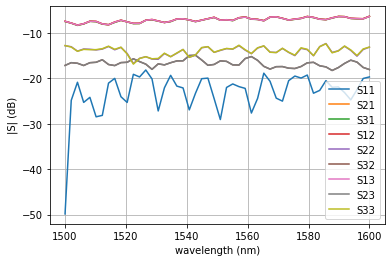

In [8]:
gf.simulation.plot.plot_sparameters(sp)

Ou especificar as portas, por exemplo, 1->2 e 1->3:

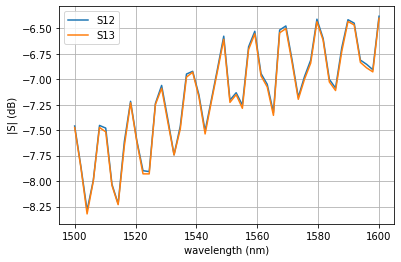

In [9]:
gf.simulation.plot.plot_sparameters(sp,keys=["o1@0,o2@0", "o1@0,o3@0"])

Podemos extrair a fase (```plot_sparameters_phase```), o *imbalance* (```plot_imbalance```), a perda (```plot_loss```) e a reflexão (```plot_reflection```):

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


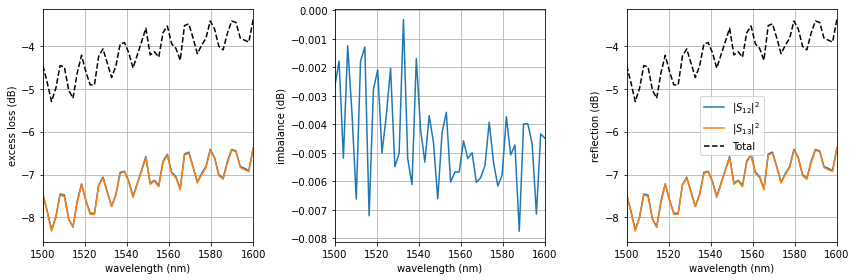

In [10]:
fig,ax = plt.subplots(1,3,figsize=(12,4))
gf.simulation.plot.plot_loss(sp,ports=["o1@0,o2@0", "o1@0,o3@0"],ax=ax[0])
gf.simulation.plot.plot_imbalance(sp,ports=["o1@0,o2@0", "o1@0,o3@0"],ax=ax[1])
gf.simulation.plot.plot_reflection(sp,ports=["o1@0,o2@0", "o1@0,o3@0"],ax=ax[2])
plt.tight_layout()
for i in range(3): ax[i].grid()

Importante lembrar que, no caso do MMI 1x2, são realizadas três simulações, excitando cada porta por vez. Podemos reduzir o tempo de simulação utilizando três maneiras:
1. observando a simetria do dispositivo;
1. utilizar a paralelização dos cálculos via MPI (https://meep.readthedocs.io/en/latest/Parallel_Meep/);
1. utilizar a paralelização das simulações via MPI.

Vamos realizar a mesma simulação, entretanto, utilizando a função ```write_sparameters_meep_batch``` da seguinte forma (utilize uma função para monitorar o uso dos recursos computacionais):

In [11]:
filepath_mpi = gm.write_sparameters_meep_mpi(
    component=c,
    cores=4,
    resolution=30,
    is_3d = False,
    overwrite = True,
)

Using MPI version 4.0, 4 processes

Elapsed run time = 971.2071 s

2023-06-09 11:24:38.717 | WARNING  | gdsfactory.pdk:get_active_pdk:563 - No active PDK. Activating generic PDK.

2023-06-09 11:24:38.728 | WARNING  | gdsfactory.pdk:get_active_pdk:563 - No active PDK. Activating generic PDK.

2023-06-09 11:24:38.781 | WARNING  | gdsfactory.pdk:get_active_pdk:563 - No active PDK. Activating generic PDK.

2023-06-09 11:24:38.781 | WARNING  | gdsfactory.pdk:get_active_pdk:563 - No active PDK. Activating generic PDK.

  0%|          | 0/3 [00:00<?, ?it/s]2023-06-09 11:24:38.852 | WARNING  | gdsfactory.config:showwarning:60 - Casting complex values to real discards the imaginary part
/home/adolfofh/mambaforge/lib/python3.9/site-packages/meep/__init__.py:4439: ComplexWarning: Casting complex values to real discards the imaginary part
  return _meep.create_structure(cell_size, dft_data_list_, pml_1d_vols_, pml_2d_vols_, pml_3d_vols_, absorber_vols_, gv, br, sym, num_chunks, Courant, use_anisot

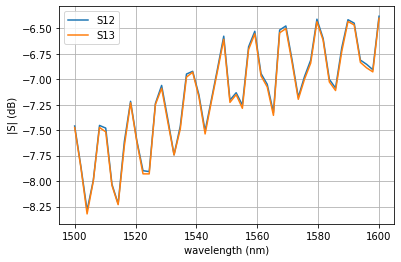

In [12]:
sp_mpi = np.load(filepath_mpi)
gm.plot.plot_sparameters(sp_mpi,keys=["o1@0,o2@0", "o1@0,o3@0"])

In [13]:
c1_dict = {"component": c}
jobs = [
    c1_dict,
]

filepath_batch = gm.write_sparameters_meep_batch(
    jobs=jobs,
    cores_per_run=4,
    total_cores=8,
    delete_temp_files=False,
    lazy_parallelism=True,
    overwrite = True,
)

  0%|          | 0/1 [00:00<?, ?it/s]

{'component': mmi1x2_3b631b3b: uid 04923195, ports ['o1', 'o2', 'o3'], references [], 4 polygons,
 'lazy_parallelism': True,
 'overwrite': True}
Using MPI version 4.0, 4 processes

Elapsed run time = 1028.0874 s

2023-06-09 11:40:53.303 | WARNING  | gdsfactory.pdk:get_active_pdk:563 - No active PDK. Activating generic PDK.

2023-06-09 11:40:53.322 | WARNING  | gdsfactory.pdk:get_active_pdk:563 - No active PDK. Activating generic PDK.

2023-06-09 11:40:53.349 | WARNING  | gdsfactory.pdk:get_active_pdk:563 - No active PDK. Activating generic PDK.

2023-06-09 11:40:53.349 | WARNING  | gdsfactory.pdk:get_active_pdk:563 - No active PDK. Activating generic PDK.

  0%|          | 0/3 [00:00<?, ?it/s]2023-06-09 11:40:53.486 | WARNING  | gdsfactory.config:showwarning:60 - Casting complex values to real discards the imaginary part
/home/adolfofh/mambaforge/lib/python3.9/site-packages/meep/__init__.py:4439: ComplexWarning: Casting complex values to real discards the imaginary part
  return _meep.

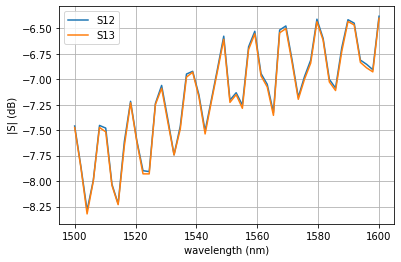

In [19]:
sp_batch = np.load(filepath_batch[0])
gm.plot.plot_sparameters(sp_batch, keys=["o1@0,o2@0", "o1@0,o3@0"])

Finalmente, podemos observar a geometria do dispositivo, incluindo suas portas:

In [20]:
scene = c.to_3d()
scene.show()

trimesh: threejs viewer

Um importante observar que o retorno da função ```write_sparameters_meep```, quando ```run=False```, é um objeto tipo ```Simulation dict```. Portanto, é possível realizar a simulação sem o plugin com o seguinte comando:

2023-06-09 12:04:47.347 | WARNING  | gdsfactory.config:showwarning:60 - Casting complex values to real discards the imaginary part
/home/adolfofh/mambaforge/lib/python3.9/site-packages/meep/__init__.py:4445: ComplexWarning: Casting complex values to real discards the imaginary part
  return _meep._get_epsilon_grid(gobj_list, mlist, _default_material, _ensure_periodicity, gv, cell_size, cell_center, nx, xtics, ny, ytics, nz, ztics, grid_vals, frequency)
2023-06-09 12:04:48.700 | WARNING  | gdsfactory.config:showwarning:60 - Casting complex values to real discards the imaginary part
/home/adolfofh/mambaforge/lib/python3.9/site-packages/meep/__init__.py:4439: ComplexWarning: Casting complex values to real discards the imaginary part
  return _meep.create_structure(cell_size, dft_data_list_, pml_1d_vols_, pml_2d_vols_, pml_3d_vols_, absorber_vols_, gv, br, sym, num_chunks, Courant, use_anisotropic_averaging, tol, maxeval, gobj_list, center, _ensure_periodicity, _default_material, alist, ex

FloatProgress(value=0.0, description='0% done ', max=200.0)

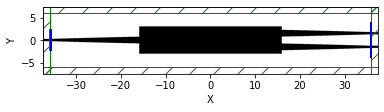

In [21]:
sp = gm.write_sparameters_meep(c, run=False, ymargin_top=3, ymargin_bot=3, is_3d=False)
sp.run(until=200)

Importante lembrar que por meio desse último comando, podemos acessar várias informações sobre o campo. Por exemplo:

In [22]:
def field_func(x):
    return np.real(x)
field_parameters={
    "alpha": 0.8,
    "cmap": "jet",
    "interpolation": "none",
    "post_process": field_func,
    "colorbar":True,
}
monitor_parameters={
    "offset":30,
    "label_alpha":0.5,
    "label_color":'blue',
}
source_parameters={
    "offset":-20,
    "label_alpha":0.5,
    "label_color":'red',
}
colorbar_parameters={
    "label":'Field - Ez',
    "orientation":'vertical',
    "extend":'neither',
    "format":None,
    "position":'right',
    "size":'5%',
    "pad":'5%',
}

2023-06-09 12:07:07.873 | WARNING  | gdsfactory.config:showwarning:60 - The specified user volume is larger than the simulation domain and has been truncated.
/home/adolfofh/mambaforge/lib/python3.9/site-packages/meep/visualization.py:271: UserWarning: The specified user volume is larger than the simulation domain and has been truncated.
  warnings.warn(


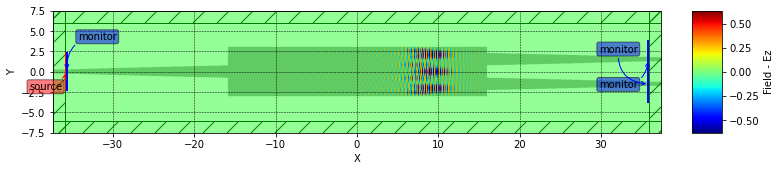

In [23]:
fig,ax=plt.subplots(figsize=(12,4))
mp.visualization.plot2D(sp,
    ax,
    output_plane=mp.Volume(center=mp.Vector3(0,0,0), size=mp.Vector3(80,16,0)),
    labels='Teste',
    monitor_parameters=monitor_parameters,
    source_parameters=source_parameters,
    fields=mp.Ez,
    field_parameters=field_parameters,
    colorbar_parameters=colorbar_parameters)
ax.grid(True,color='black',linestyle='--',linewidth=0.5)

É possível observar que o tempo utilizado para simulação foi insuficiente. Nesta situação, considere alterar os parâmetros de simulação (https://meep.readthedocs.io/en/latest/Python_User_Interface/#run-and-step-functions). Observe também que o campo ```size``` do argumento ```output_plane``` indica o tamanho da região de monitoração do campo. Para visualizar na escala em log é preciso alterar a função de pós-processamento por meio do campo ```post_process```:

2023-06-09 12:07:13.140 | WARNING  | gdsfactory.config:showwarning:60 - The specified user volume is larger than the simulation domain and has been truncated.
/home/adolfofh/mambaforge/lib/python3.9/site-packages/meep/visualization.py:271: UserWarning: The specified user volume is larger than the simulation domain and has been truncated.
  warnings.warn(
2023-06-09 12:07:13.141 | WARNING  | gdsfactory.config:showwarning:60 - Casting complex values to real discards the imaginary part
/home/adolfofh/mambaforge/lib/python3.9/site-packages/meep/__init__.py:4445: ComplexWarning: Casting complex values to real discards the imaginary part
  return _meep._get_epsilon_grid(gobj_list, mlist, _default_material, _ensure_periodicity, gv, cell_size, cell_center, nx, xtics, ny, ytics, nz, ztics, grid_vals, frequency)


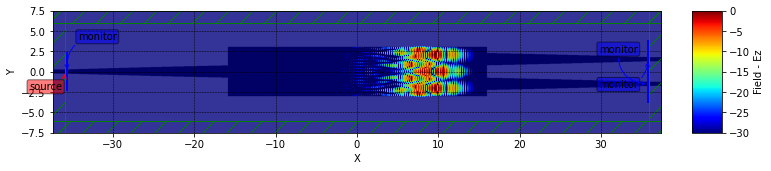

In [24]:
def field_func_dB(x):
    x_dB = 10*np.log10(x*np.conjugate(x))
    x_norm = x_dB - x_dB.max()
    x_norm[np.where(x_norm < -30)] = -30
    return x_norm

field_parameters={
    "alpha": 0.8,
    "cmap": "jet",
    "interpolation": "none",
    "post_process": field_func_dB,
    "colorbar":True,
}
fig,ax=plt.subplots(figsize=(12,4))
mp.visualization.plot2D(sp,
    ax,
    output_plane=mp.Volume(center=mp.Vector3(0,0,0), size=mp.Vector3(80,30,0)),
    labels='Teste',
    monitor_parameters=monitor_parameters,
    source_parameters=source_parameters,
    fields=mp.Ez,
    field_parameters=field_parameters,
    colorbar_parameters=colorbar_parameters)
ax.grid(True,color='black',linestyle='--',linewidth=0.5)